# L1_&_L2 Regression

In [ ]:
# import librabries
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
from sklearn.datasets import fetch_california_housing

### 1. Load Data

In [92]:
California_housing_data = fetch_california_housing()
data = pd.DataFrame(California_housing_data.data, columns=California_housing_data.feature_names)

In [93]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [94]:
data['MedHouseVal'] = California_housing_data.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 2. Data Exploration

In [95]:
# check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [96]:
# check summary
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [97]:
# check null values
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

### EDA (Exploratory data analysis)


Correlation with MedHouseVal:
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


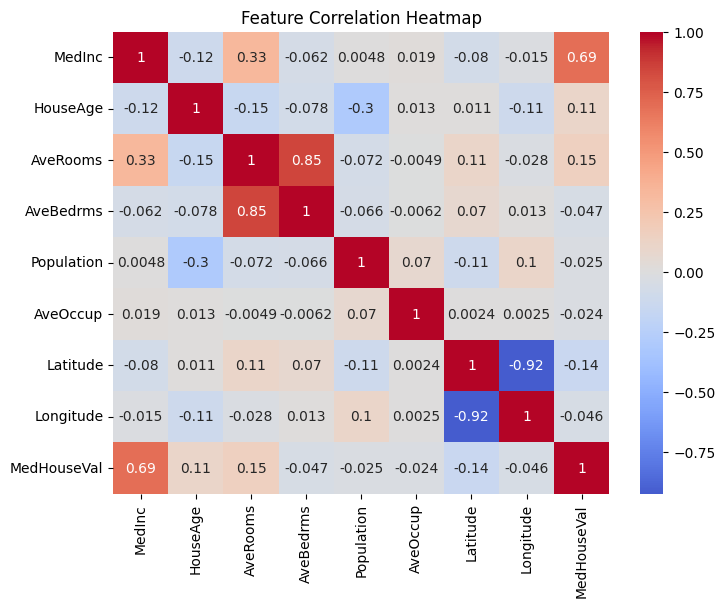

In [98]:
# check correlation
plt.figure(figsize=(8,6))
correlation_with_target = data.corr()['MedHouseVal'].sort_values(ascending=False)
print("\nCorrelation with MedHouseVal:")
print(correlation_with_target)

sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

Top features to plot: ['MedInc', 'AveRooms', 'HouseAge']


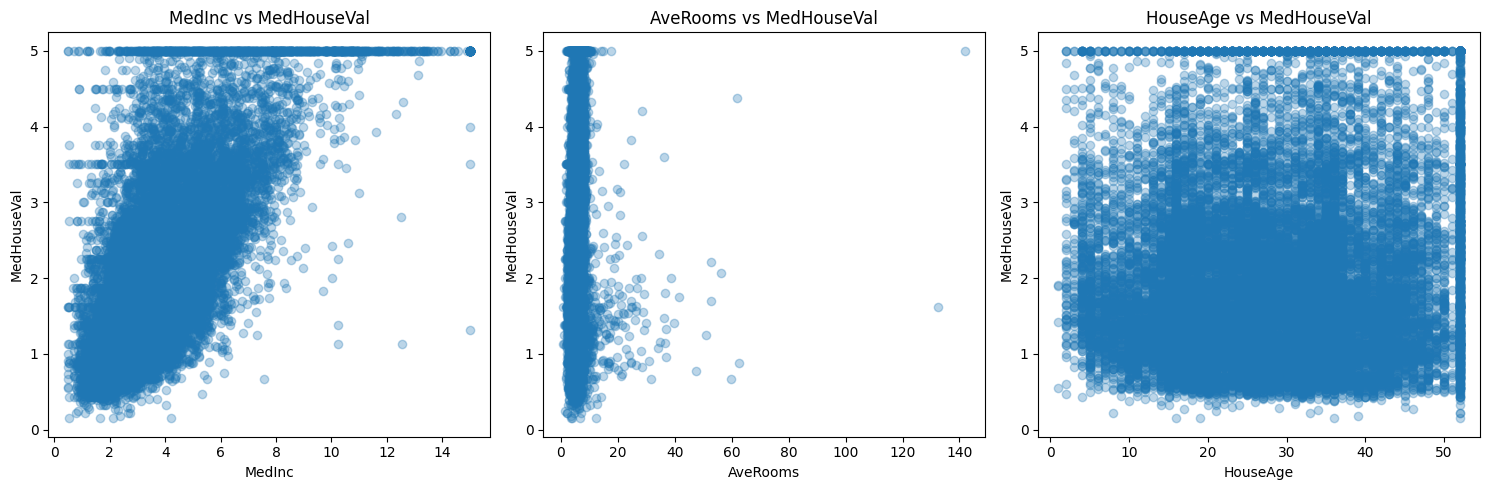

In [99]:
# Plot relationships with top correlated features
top_features = correlation_with_target.index[1:4]  # Skip MedHouseVal itself

print("Top features to plot:", top_features.tolist())  # Debug print

plt.figure(figsize=(15, 5))
for i, feature in enumerate(top_features, 1):
    plt.subplot(1, 3, i)
    plt.scatter(data[feature], data['MedHouseVal'], alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel('MedHouseVal')
    plt.title(f'{feature} vs MedHouseVal')
plt.tight_layout()
plt.show()

In [100]:
# Prepare data for Linear Regression
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

In [101]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Train Linear Regression Model
print("\nTraining Linear Regression Model...")
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


Training Linear Regression Model...


In [103]:
# Lasso Regression (L1)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# Ridge Regression (L2)
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

In [109]:
### 5. Evaluate Models
from sklearn.metrics import root_mean_squared_error


models = {
    'Linear Regression': lr_pred,
    'Lasso Regression': lasso_pred,
    'Ridge Regression': ridge_pred
}

for name, pred in models.items():
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    rmse = np.sqrt(mse)
    print(f"{name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  R2 Score: {r2:.4f}\n")
    print(f"  RMSE: {rmse:.4f}\n")


Linear Regression:
  MSE: 0.5559
  R2 Score: 0.5758

  RMSE: 0.7456

Lasso Regression:
  MSE: 0.6135
  R2 Score: 0.5318

  RMSE: 0.7833

Ridge Regression:
  MSE: 0.5559
  R2 Score: 0.5758

  RMSE: 0.7456



<Figure size 1200x600 with 0 Axes>

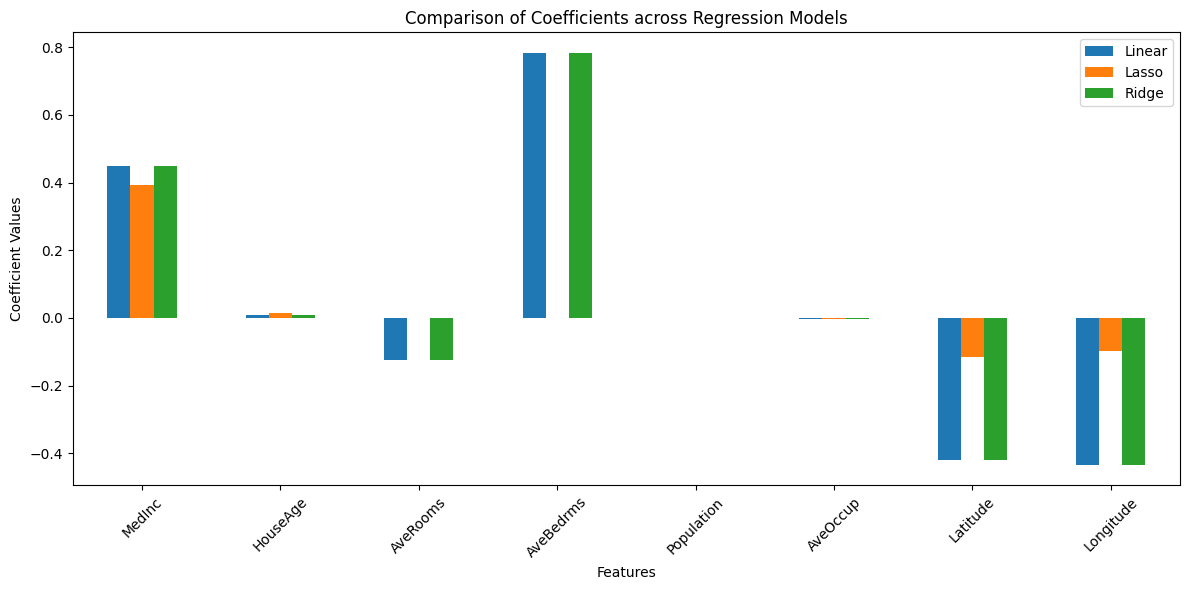

In [111]:
### 6. Compare Coefficients
plt.figure(figsize=(12, 6))
coefficients = pd.DataFrame({
    'Linear': lr.coef_,
    'Lasso': lasso.coef_,
    'Ridge': ridge.coef_
}, index=X.columns)

coefficients.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Coefficients across Regression Models')
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()